# **TRABALHO FINAL DE ANÁLISE MULTIVARIADA**

Formule uma questão de pesquisa de acordo com as técnicas de análise multivariada aboradadas na disciplina, escolha 3 métodos e desevolva a análise multivariada.

# Distribuições de probabilidade multivariadas

As distribuições multivariadas são projetadas para descrever as distribuições de probabilidade de mais de uma variável aleatória ao mesmo tempo. Como as variáveis ​​geralmente são correlacionadas, explorá-las individualmente só fornecerá informações limitadas

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "dados-sobre-vinhos"

Estrutura dos dados multivariados

Formato retangular - organizado por linhas e colunas

In [2]:
# Leitura ndo conjunto de dados do vinho
wine <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", sep = ",")

# Imprime as quatro primeiras entradas
head(wine, n = 4)

V1 V2    V3   V4   V5   V6  V7   V8   V9   V10  V11  V12  V13  V14 
1 1  14.23 1.71 2.43 15.6 127 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065
2 1  13.20 1.78 2.14 11.2 100 2.65 2.76 0.26 1.28 4.38 1.05 3.40 1050
3 1  13.16 2.36 2.67 18.6 101 2.80 3.24 0.30 2.81 5.68 1.03 3.17 1185
4 1  14.37 1.95 2.50 16.8 113 3.85 3.49 0.24 2.18 7.80 0.86 3.45 1480

Este conjunto de dados se trata de dados são resultados de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.

Os atributos são:

1) Álcool;

2) Ácido málico;

3) Cinzas;

4) Alcalinidade das cinzas;

5) Magnésio;

6) Fenóis totais;

7) Flavanoides;

8) Fenóis não flavonóides;

9) Proantocianinas;

10) Intensidade da cor;

11) Matiz;

12) OD280/OD315 de vinhos diluídos;

13) Prolina.

Em um contexto de classificação, este é um problema bem colocado com estruturas de classe "bem comportadas".

Fonte dos dados: https://archive.ics.uci.edu/ml/datasets/wine .

In [3]:
# Encontre as dimensões dos dados
dim(wine)

[1] 178  14

In [4]:
# Verifique os nomes do conjunto de dados do vinho
names(wine)

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14"

In [5]:
# Atribuir novos nomes
colnames(wine) <- c('Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids','Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline')
          
# Verifique os novos nomes das colunas
names(wine)

[1] "Type"            "Alcohol"         "Malic"           "Ash"            
 [5] "Alcalinity"      "Magnesium"       "Phenols"         "Flavanoids"     
 [9] "Nonflavanoids"   "Proanthocyanins" "Color"           "Hue"            
[13] "Dilution"        "Proline"

In [6]:
# Verifica o tipo/estrutura de dados de cada variável
str(wine)

'data.frame':	178 obs. of  14 variables:
 $ Type           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol        : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic          : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash            : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinity     : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium      : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Phenols        : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids     : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoids  : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins: num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color          : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue            : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ Dilution       : num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ Proline        

In [7]:
# Muda o tipo de dados da variável Type
wine$Type <- as.factor(wine$Type)

# Verifique o tipo/estrutura de dados novamente
str(wine)

'data.frame':	178 obs. of  14 variables:
 $ Type           : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol        : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic          : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash            : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinity     : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium      : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Phenols        : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids     : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoids  : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins: num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color          : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue            : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ Dilution       : num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 

# Média de vetor e matriz de covariância e variância

* Para dados multivariados, a média identifica a localização da distribuição em um espaço multidimensional;
* A variância-covariância mede a dispersão de dados multivariados em várias direções;

In [8]:
# Calcula a média das variáveis Alcohol, Malic, Ash e Alcalinity
colMeans(wine[, 2:5])

Alcohol      Malic        Ash Alcalinity 
 13.000618   2.336348   2.366517  19.494944

In [9]:
# Calcula a média das variáveis por tipo de vinho
by(wine[2:5], wine$Type, colMeans)

wine$Type: 1
   Alcohol      Malic        Ash Alcalinity 
 13.744746   2.010678   2.455593  17.037288 
------------------------------------------------------------ 
wine$Type: 2
   Alcohol      Malic        Ash Alcalinity 
 12.278732   1.932676   2.244789  20.238028 
------------------------------------------------------------ 
wine$Type: 3
   Alcohol      Malic        Ash Alcalinity 
 13.153750   3.333750   2.437083  21.416667 

In [10]:
# Calcula a matriz de variância-covariância das variáveis Alcohol, Malic, Ash, Alcalinity
var.wine <- var(wine[2:5])

# Arredonde os valores da matriz para duas casas decimais
round(var.wine, 2)

Alcohol Malic Ash  Alcalinity
Alcohol     0.66   0.09  0.05 -0.84     
Malic       0.09   1.25  0.05  1.08     
Ash         0.05   0.05  0.08  0.41     
Alcalinity -0.84   1.08  0.41 11.15

A matriz mostra que https://support.minitab.com/pt-br/minitab/20/help-and-how-to/statistical-modeling/multivariate/how-to/item-analysis/interpret-the-results/all-statistics-and-graphs/

In [11]:
library(corrplot)

corrplot 0.92 loaded



In [12]:
# Calcular a matriz de correlação
cor.wine <- cor(wine[, 2:5])

# Arredonda a matriz para duas casas decimais
round(cor.wine, 2)

Alcohol Malic Ash  Alcalinity
Alcohol     1.00   0.09  0.21 -0.31     
Malic       0.09   1.00  0.16  0.29     
Ash         0.21   0.16  1.00  0.44     
Alcalinity -0.31   0.29  0.44  1.00

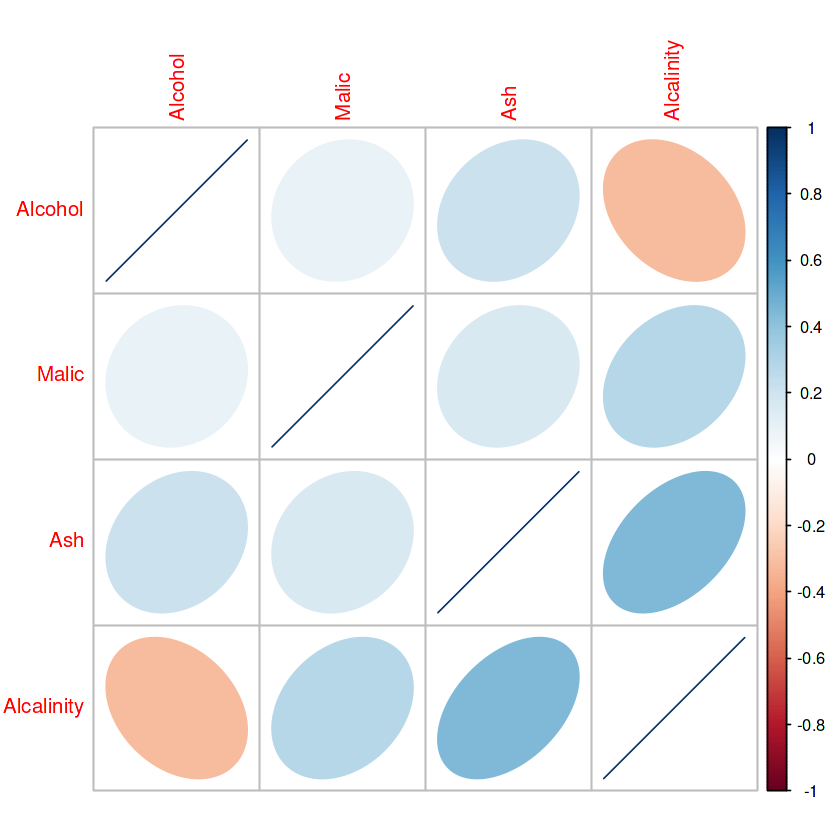

In [13]:
# Plote as correlações
corrplot(cor.wine, method = "ellipse")

As variáveis que mais se correlacionam são Ash e Alcalinity

# Plotando dados multivariados

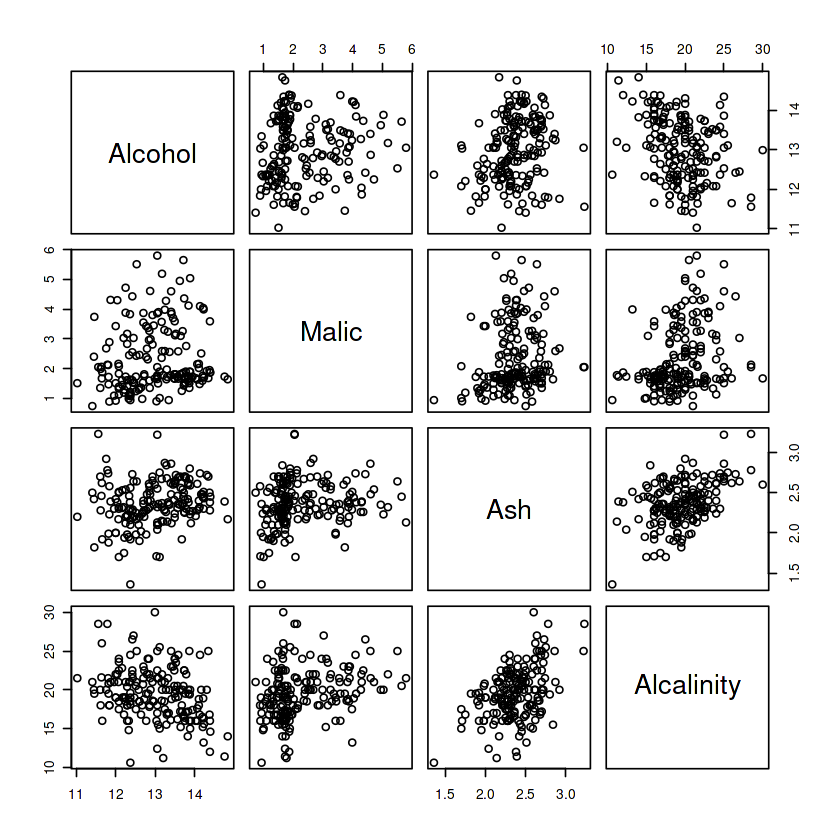

In [14]:
library(lattice)
# Matriz de gráfico de dispersão usando a função base R plot
pairs(wine[,2:5])

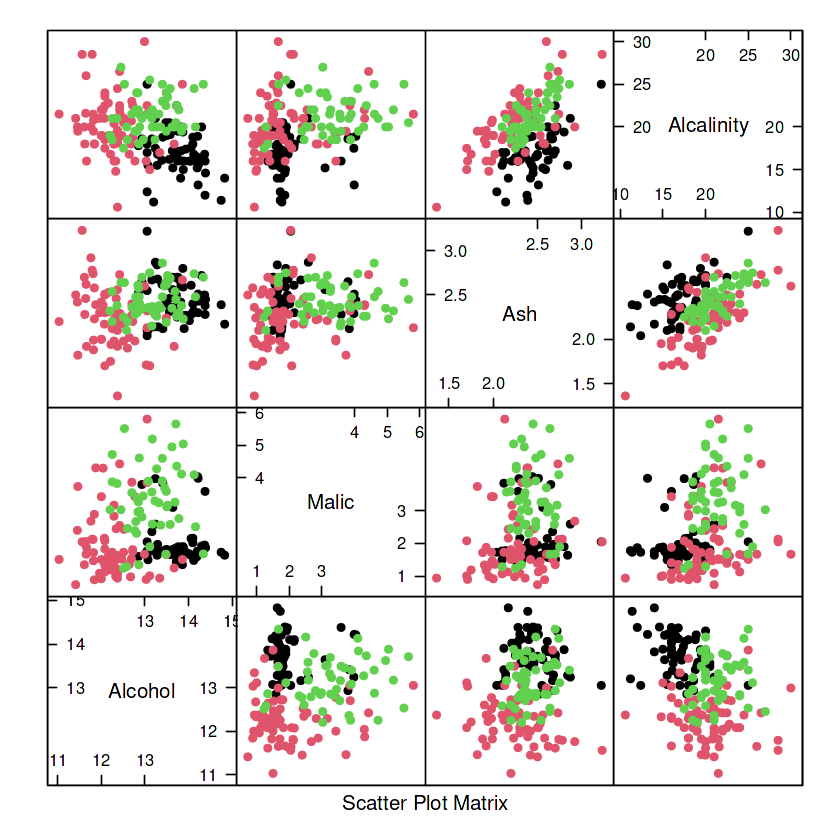

In [15]:
# Matriz de gráfico de dispersão colorida por grupos
splom( ~ wine[,2:5],  pch = 16, col = wine$Type)

In [16]:
library(ggplot2)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



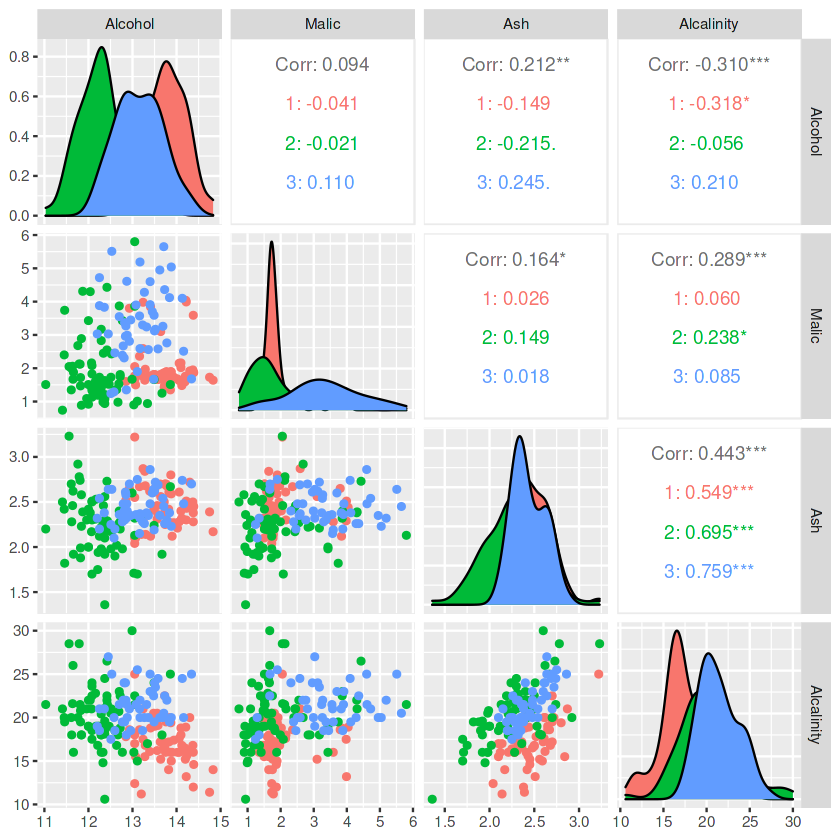

In [17]:
# Colorir os pontos por tipo de vinho
wine.gg <- ggpairs(data = wine, mapping = aes(color = Type), columns = 2:5)
wine.gg

# Distribuição normal multivariada

É uma generalização da normal univariada e é especificada por um vetor médio e uma matriz de covariância de variância. Mesmo que todas as variáveis sigam individualmente uma normal univariada, a distribuição conjunta pode não ser uma normal multivariada.

* Uma normal univariada é uma distribuição simétrica, unidimensional, em forma de sino.

Funções para distribuições estatísticas no R:

* Probabilidade;

* Quantil;

* Densidade;

* Random.

In [18]:
library(mvtnorm)

In [19]:
mu.sim <- c(2, -2, 1)
sigma.sim <- matrix(data = c(9,5,5,5,5,3,5,3,4), nrow = 3)
# Gera 100 amostras normais bivariadas
multnorm.sample <- rmvnorm(n = 100, mean = mu.sim, sigma = sigma.sim)

# Veja as 6 primeiras amostras
head(multnorm.sample)

[,1]       [,2]       [,3]        
[1,] -1.8518672 -2.2642806 -0.167905101
[2,]  0.9616525 -1.7376556  1.544771403
[3,] -2.1859693 -2.7677374 -0.009713521
[4,]  1.5382348 -2.3762279 -0.220071656
[5,]  0.3059004 -3.4070740 -1.797053302
[6,]  5.2274057 -0.8681175  3.516880898

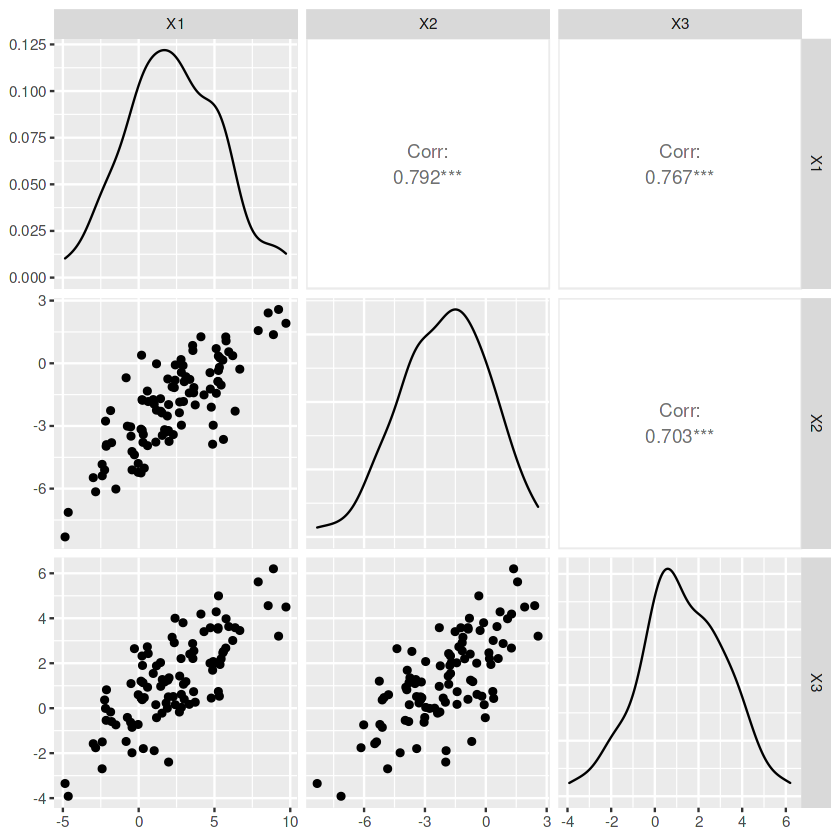

In [20]:
# Gráfico de dispersão das amostras bivariadas
ggpairs(data.frame(multnorm.sample))

# Densidade de uma distribuição normal multivariada

In [21]:
library(scatterplot3d)

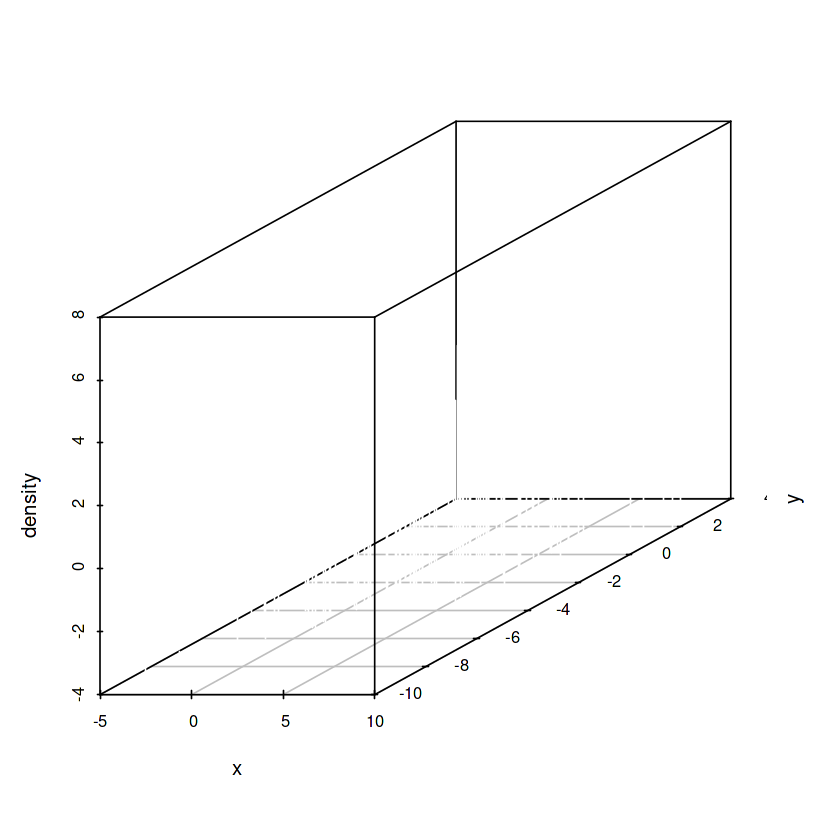

In [22]:
# Calcular densidade
multnorm.dens <- dmvnorm(multnorm.sample, mean = mu.sim, sigma = sigma.sim)

# Cria um gráfico de dispersão de alturas de densidade
scatterplot3d(cbind(multnorm.sample, multnorm.dens),    
                color="blue", pch="", type = "h",             
                              xlab = "x", ylab = "y", zlab = "density")

# Distribuição cumulativa e CDF inverso

In [23]:
# Volume sob uma normal padrão bivariada
pmvnorm(lower = c(-1, -1), upper = c(1, 1))

[1] 0.4660649
attr(,"error")
[1] 1e-15
attr(,"msg")
[1] "Normal Completion"

In [24]:
# Volume sob média especificada e matriz de variância-covariância
pmvnorm(lower = c(-5, -5), upper = c(5, 5), mean = mu.sim, sigma = sigma.sim)

Warning message in cbind(lower, upper, mean):
“number of rows of result is not a multiple of vector length (arg 1)”


[1] 0.7484003
attr(,"error")
[1] 0.0001731284
attr(,"msg")
[1] "Normal Completion"

In [25]:
# Contornos de probabilidade para uma normal bivariada padrão
qmvnorm(0.9, tail = "both", sigma = diag(2))

$quantile
[1] 1.948779

$f.quantile
[1] -1.537507e-06

attr(,"message")
[1] "Normal Completion"

In [26]:
# Contornos de probabilidade para uma normal bivariada
qmvnorm(0.95, tail = "both", mean = mu.sim, sigma = sigma.sim)

$quantile
[1] 7.237454

$f.quantile
[1] 3.622024e-06

attr(,"message")
[1] "Normal Completion"

# Verificando a normalidade de dados multivariados

Por que verificar a normalidade?

Técnicas estatísticas clássicas que assumem normalidade univariada/multivariada:
* Regressão multivariada;
* Análise discriminante;
* Clustering baseado em modelo;
* PCA;
* Análise de variância multivariada (MANOVA).

Testes de normalidade univariada:
* Qqnorm: criado pela plotagem dos quantis teóricos em relação aos quantis de amostra dos dados. Se os valores estiverem ao longo da linha de referência, a distribuição é próxima da normal;
O desvio da linha reta pode indicar:
* Caudas mais pesadas;
* Distorção;
* Atípicos;
* Dados agrupados.

Se qualquer variável única não seguir a normalidade, não podemos ter normalidade multivariada conjunta.

Testes de normalidade multivariados:

Testes de normalidade MV por:
* Mardia;
* Henze-Zirkler;
* Royston.

Abordagens gráficas:
* Qui-quadrado QQplot;
* Perspectiva;
* Gráficos de contorno.

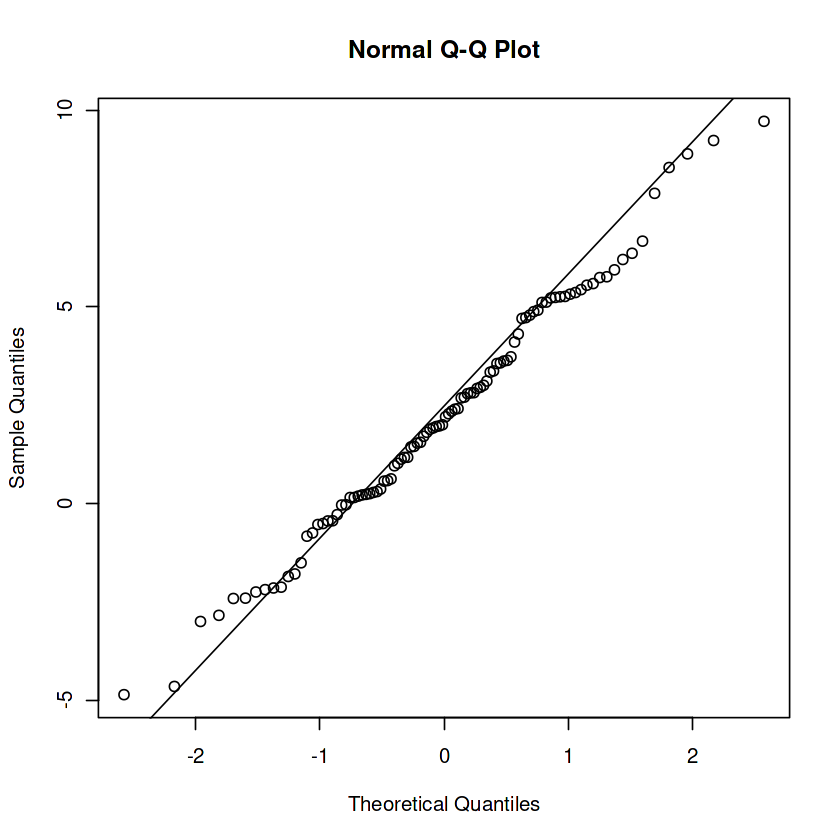

In [27]:
# Teste a normalidade da amostra
qqnorm(multnorm.sample[, 1])
qqline(multnorm.sample[, 1])

In [28]:
library(MVN)

In [29]:
help("mvn")

mvn                    package:MVN                     R Documentation

_M_u_l_t_i_v_a_r_i_a_t_e _N_o_r_m_a_l_i_t_y _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     Performs multivariate normality tests, including Marida, Royston,
     Henze-Zirkler, Dornik-Haansen, E-Statistics, and graphical
     approaches and implements multivariate outlier detection and
     univariate normality of marginal distributions through plots and
     tests, and performs multivariate Box-Cox transformation.

_U_s_a_g_e:

     mvn(
       data,
       subset = NULL,
       mvnTest = "hz",
       covariance = TRUE,
       tol = 1e-25,
       alpha = 0.5,
       scale = FALSE,
       desc = TRUE,
       transform = "none",
       R = 1000,
       univariateTest = "AD",
       univariatePlot = "none",
       multivariatePlot = "none",
       multivariateOutlierMethod = "none",
       bc = FALSE,
       bcType = "rounded",
       showOutliers = FALSE,
       showNewData = FALSE
     )
     
_A_r_g_u_m_e_n_t_s:

    data: a numeric matrix or data frame.

  subset: define a variable name if subset analysis is required.

 mvnTest: select one of the MVN tests. Type ‘"mardia"’ for Mardia's
          test, ‘"hz"’ for Henze-Zirkler's test, ‘"royston"’ for
          Royston's test, ‘"dh"’ for Doornik-Hansen's test and ‘energy’
          for E-statistic. Default is Henze-Zirkler's test ‘"hz"’. See
          details for further information.

covariance: this option works for ‘"mardia"’ and ‘"royston"’. If ‘TRUE’
          covariance matrix is normalized by ‘n’, if ‘FALSE’ it is
          normalized by ‘n-1’.

     tol: a numeric tolerance value which isused for inversion of the
          covariance matrix (‘default = 1e-25’.

   alpha: a numeric parameter controlling the size of the subsets over
          which the determinant is minimized. Allowed values for the
          alpha are between 0.5 and 1 and the default is 0.5.

   scale: if ‘TRUE’ scales the colums of data.

    desc: a logical argument. If ‘TRUE’ calculates descriptive
          statistics.

transform: select a transformation method to transform univariate
          marginal via logarithm (‘"log"’), square root (‘"sqrt"’) and
          square (‘"square"’).

       R: number of bootstrap replicates for Energy test, default is
          1000.

univariateTest: select one of the univariate normality tests,
          Shapiro-Wilk (‘"SW"’), Cramer-von Mises (‘"CVM"’), Lilliefors
          (‘"Lillie"’), Shapiro-Francia (‘"SF"’), Anderson-Darling
          (‘"AD"’). Default is Anderson-Darling (‘"AD"’). Do not apply
          Shapiro-Wilk's test, if dataset includes more than 5000 cases
          or less than 3 cases.

univariatePlot: select one of the univariate normality plots, Q-Q plot
          (‘"qq"’), histogram (‘"histogram"’), box plot (‘"box"’),
          scatter (‘"scatter"’).

multivariatePlot: ‘"qq"’ for chi-square Q-Q plot, ‘"persp"’ for
          perspective plot, ‘"contour"’ for contour plot.

multivariateOutlierMethod: select multivariate outlier detection
          method, ‘"quan"’ quantile method based on Mahalanobis
          distance (default) and ‘"adj"’ adjusted quantile method based
          on Mahalanobis distance.

      bc: if ‘TRUE’ it applies Box-Cox power transformation.

  bcType: select ‘"optimal"’ or ‘"rounded"’ type of Box-Cox power
          transformation, only applicable if ‘bc = TRUE’, default is
          ‘"rounded"’.

showOutliers: if ‘TRUE’ prints multivariate outliers.

showNewData: if ‘TRUE’ prints new data without outliers.

_D_e_t_a_i_l_s:

     If ‘mvnTest = "mardia"’, it calculates the Mardia's multivariate
     skewness and kurtosis coefficients as well as their corresponding
     statistical significance. It can also calculate corrected version
     of skewness coefficient for small sample size (n< 20). For
     multivariate normality, both p-values of skewness and kurtosis
     statistics should be greate

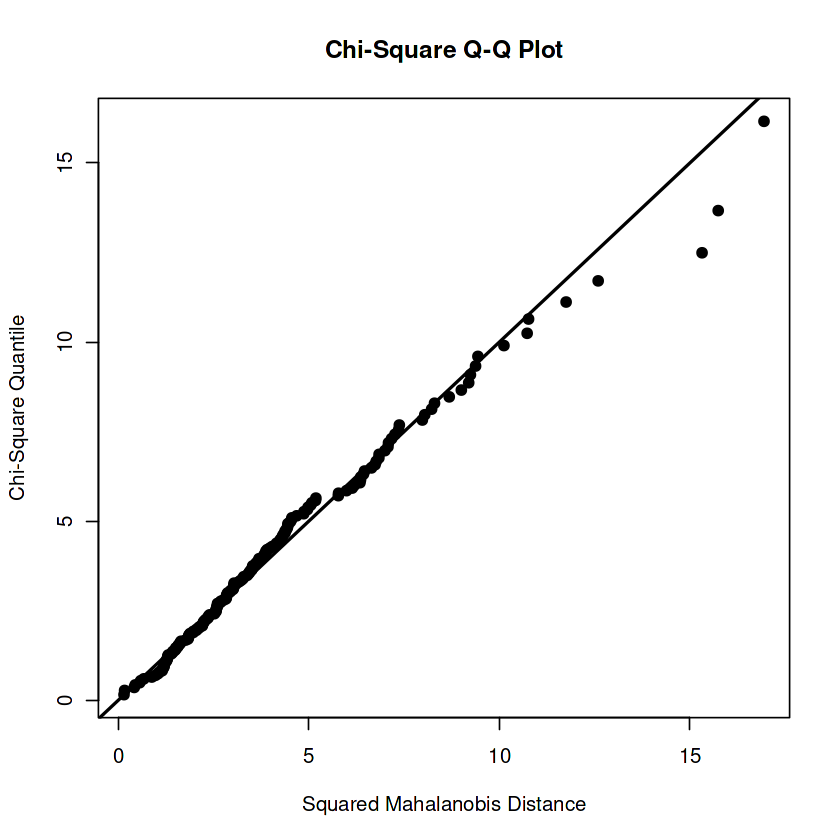

In [30]:
# MardiaTest qqplot 
wine.mvntest <- mvn(data = wine[, 2:5], mvnTest = "mardia",  multivariatePlot = "qq")

In [31]:
wine.mvntest

$multivariateNormality
             Test         Statistic              p value Result
1 Mardia Skewness   80.605641908137 3.09764065780592e-09     NO
2 Mardia Kurtosis 0.559382574051838    0.575900651525058    YES
3             MVN              <NA>                 <NA>     NO

$univariateNormality
              Test   Variable Statistic   p value Normality
1 Anderson-Darling  Alcohol      1.0335  0.0099      NO    
2 Anderson-Darling   Malic       7.6193  <0.001      NO    
3 Anderson-Darling    Ash        0.6784  0.0752      YES   
4 Anderson-Darling Alcalinity    0.5008  0.2053      YES   

$Descriptives
             n      Mean   Std.Dev Median   Min   Max    25th    75th
Alcohol    178 13.000618 0.8118265 13.050 11.03 14.83 12.3625 13.6775
Malic      178  2.336348 1.1171461  1.865  0.74  5.80  1.6025  3.0825
Ash        178  2.366517 0.2743440  2.360  1.36  3.23  2.2100  2.5575
Alcalinity 178 19.494944 3.3395638 19.500 10.60 30.00 17.2000 21.5000
                 Skew   Kurtosis
Alcohol    -0.0506179 -0.8862122
Malic       1.0221946  0.2208517
Ash        -0.1737324  1.0328782
Alcalinity  0.2094697  0.4022708

In [32]:
# Usando mardiaTest
mvn(multnorm.sample)

$multivariateNormality
           Test        HZ   p value MVN
1 Henze-Zirkler 0.6390701 0.6944921 YES

$univariateNormality
              Test  Variable Statistic   p value Normality
1 Anderson-Darling  Column1     0.3052    0.5620    YES   
2 Anderson-Darling  Column2     0.2048    0.8698    YES   
3 Anderson-Darling  Column3     0.2268    0.8113    YES   

$Descriptives
    n      Mean  Std.Dev    Median       Min      Max       25th       75th
1 100  2.250900 3.031735  2.106200 -4.855700 9.716656  0.2131767  4.7436071
2 100 -2.014305 2.162651 -1.841701 -8.310879 2.576277 -3.4606975 -0.4447317
3 100  1.257689 1.968542  1.150770 -3.917264 6.200102  0.1249974  2.5747388
         Skew   Kurtosis
1  0.10501596 -0.3025761
2 -0.24994125 -0.2402893
3 -0.05358111 -0.1733000

In [33]:
# Usando hzTest
hzTest <- mvn(data = wine[, 2:5], mvnTest = "hz")

In [34]:
hzTest

$multivariateNormality
           Test       HZ      p value MVN
1 Henze-Zirkler 2.122978 2.220446e-16  NO

$univariateNormality
              Test   Variable Statistic   p value Normality
1 Anderson-Darling  Alcohol      1.0335  0.0099      NO    
2 Anderson-Darling   Malic       7.6193  <0.001      NO    
3 Anderson-Darling    Ash        0.6784  0.0752      YES   
4 Anderson-Darling Alcalinity    0.5008  0.2053      YES   

$Descriptives
             n      Mean   Std.Dev Median   Min   Max    25th    75th
Alcohol    178 13.000618 0.8118265 13.050 11.03 14.83 12.3625 13.6775
Malic      178  2.336348 1.1171461  1.865  0.74  5.80  1.6025  3.0825
Ash        178  2.366517 0.2743440  2.360  1.36  3.23  2.2100  2.5575
Alcalinity 178 19.494944 3.3395638 19.500 10.60 30.00 17.2000 21.5000
                 Skew   Kurtosis
Alcohol    -0.0506179 -0.8862122
Malic       1.0221946  0.2208517
Ash        -0.1737324  1.0328782
Alcalinity  0.2094697  0.4022708

# Distribuição t multivariada

Pode modelar caudas mais pesadas e são generalizações da distribuição t de Stundent univariada.

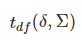

Onde df são os graus de liberdade em todas as dimensões.

In [35]:
# # Gera as amostras t
multt.sample <- rmvt(n = 200,sigma = sigma.sim, df = 5, delta = mu.sim)

# Imprime as 6 primeiras amostras
head(multt.sample)

[,1]      [,2]        [,3]      
[1,]  4.846014 -0.03992985  1.9090108
[2,]  1.910495 -1.12923113  0.4521239
[3,]  2.322033 -0.95979097  2.4747108
[4,]  3.918225 -0.60701030  1.3997614
[5,]  4.508737 -3.81822458  0.9709540
[6,] -2.916114 -3.70143410 -2.7643159

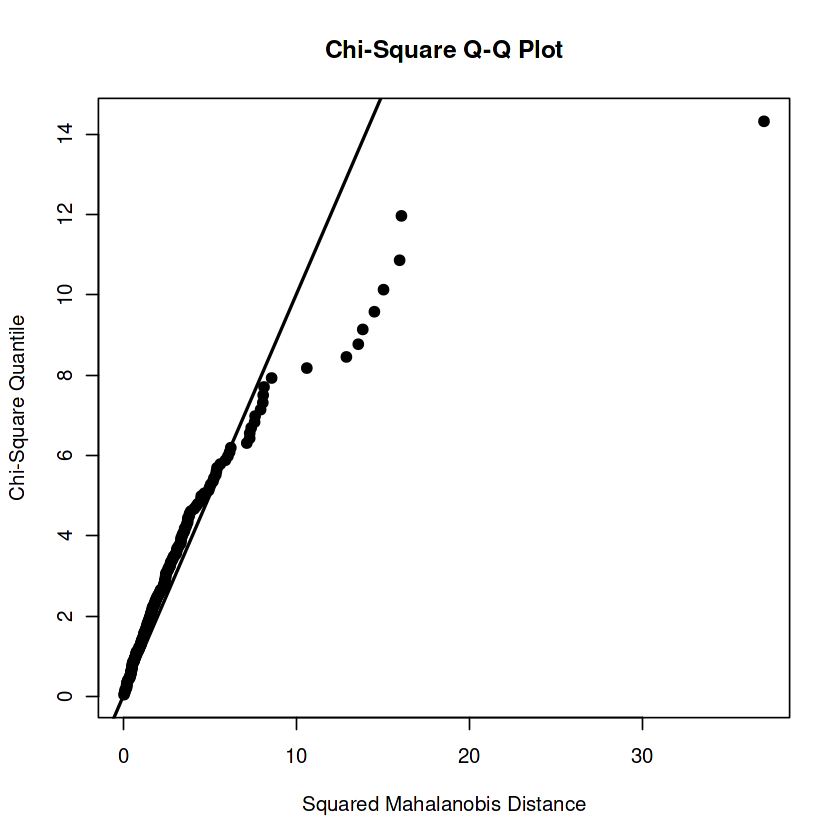

In [36]:
# Verifica a normalidade multivariada
mardiaTest <- mvn(multt.sample, mvnTest = "mardia",  multivariatePlot = "qq")

In [37]:
mardiaTest

$multivariateNormality
             Test        Statistic              p value Result
1 Mardia Skewness 74.7780522351479 5.25529295911467e-12     NO
2 Mardia Kurtosis 11.5292759654847                    0     NO
3             MVN             <NA>                 <NA>     NO

$univariateNormality
              Test  Variable Statistic   p value Normality
1 Anderson-Darling  Column1     1.4450    0.0010    NO    
2 Anderson-Darling  Column2     1.2027    0.0038    NO    
3 Anderson-Darling  Column3     0.7301    0.0561    YES   

$Descriptives
    n      Mean  Std.Dev    Median       Min       Max        25th       75th
1 200  1.911025 3.762754  2.036809 -20.13372 12.239604  0.07506747  4.4067311
2 200 -2.030854 2.784654 -1.864288 -11.79993  5.156473 -3.49645850 -0.3943161
3 200  1.093784 2.382755  1.196056 -10.83696  6.813718 -0.33590345  2.6491349
        Skew Kurtosis
1 -1.1551134 5.357372
2 -0.5986763 1.693450
3 -0.7769052 2.811320

# Densidade e densidade cumulativa para multivariada-t

In [38]:
# Calcular densidades
multt.dens <- dmvt(x = multt.sample, delta = mu.sim, sigma = sigma.sim, df = 5)

In [39]:
# Calcular o volume sob uma distribuição t
pmvt(lower = c(-5, -5), upper = c(5, 5), delta = mu.sim, df = 5, sigma = sigma.sim)

Warning message in cbind(lower, upper, mean):
“number of rows of result is not a multiple of vector length (arg 1)”


[1] 0.6430768
attr(,"error")
[1] 0.000517033
attr(,"msg")
[1] "Normal Completion"

In [40]:
# Calcular o contorno de probabilidade igual
qmvt(p = 0.9, tail = "both", sigma = diag(2))

$quantile
[1] 8.956747

$f.quantile
[1] -1.35426e-07

attr(,"message")
[1] "Normal Completion"

# Distribuições distorcidas multivariadas

Distribuição assimétrica-normal univariada e
Distribuição assimétrica-normal multivariada

In [41]:
install.packages("stats4")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats4’ is a base package, and should not be updated”


In [42]:
library(stats4)

In [43]:
library(sn)


Attaching package: ‘sn’


The following object is masked from ‘package:stats’:

    sd




In [44]:
# Gera as amostras com distorção normal
skewnorm.sample <- rmsn(n = 100, xi = mu.sim, Omega = sigma.sim, alpha = c(4, -4))

Warning message in matrix(dp$Omega, d, d):
“data length [9] is not a sub-multiple or multiple of the number of rows [2]”
Warning message in dp[[1]] + mu.z * omega:
“longer object length is not a multiple of shorter object length”
Warning message in dp0$xi + lot$aux$omega * z:
“longer object length is not a multiple of shorter object length”


In [45]:
# Imprime as primeiras seis amostras
head(skewnorm.sample)

[,1]        [,2]      
[1,]  4.00335640 -2.0603104
[2,]  2.68352196  3.3552743
[3,] -0.74267822 -0.5532691
[4,]  1.01814682 -4.0817124
[5,]  1.25536559  1.9104005
[6,] -0.04886328 -0.8687686

In [46]:
# Gera as amostras skew-t
skewt.sample <- rmst(n = 100, xi = mu.sim, Omega = sigma.sim, alpha = c(4, -4), nu = 5)

Warning message in matrix(dp$Omega, d, d):
“data length [9] is not a sub-multiple or multiple of the number of rows [2]”
Warning message in xi + t(z/sqrt(v)):
“longer object length is not a multiple of shorter object length”


In [47]:
# Imprime as primeiras seis amostras
head(skewt.sample)

[,1]       [,2]     
[1,] -0.1175319 -5.146513
[2,]  0.5113128  1.549836
[3,] -1.7623185  1.171010
[4,] -1.3300850 -3.753573
[5,] 11.8908442  7.566674
[6,]  6.1077080  2.939764

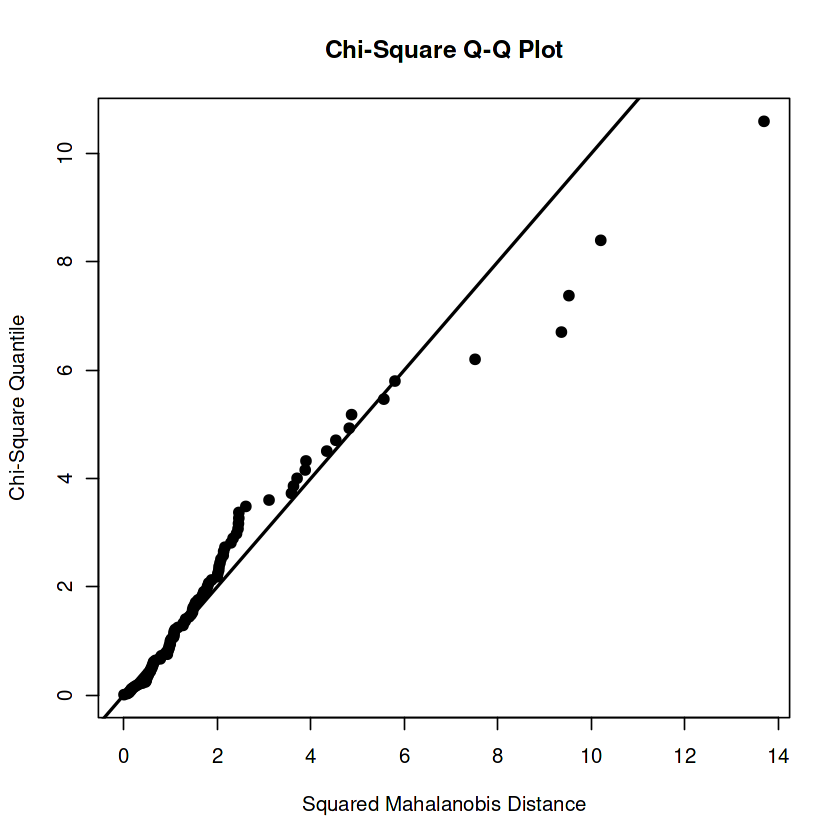

In [48]:
# Teste de normalidade para amostra t-assimétrica
skewt.Test <- mvn(skewt.sample, mvnTest = "mardia",  multivariatePlot = "qq")

# PCA

* Redução de dimensão;
* Criando variáveis não correlacionadas;
* Capturando a variabilidade em menos dimensões.

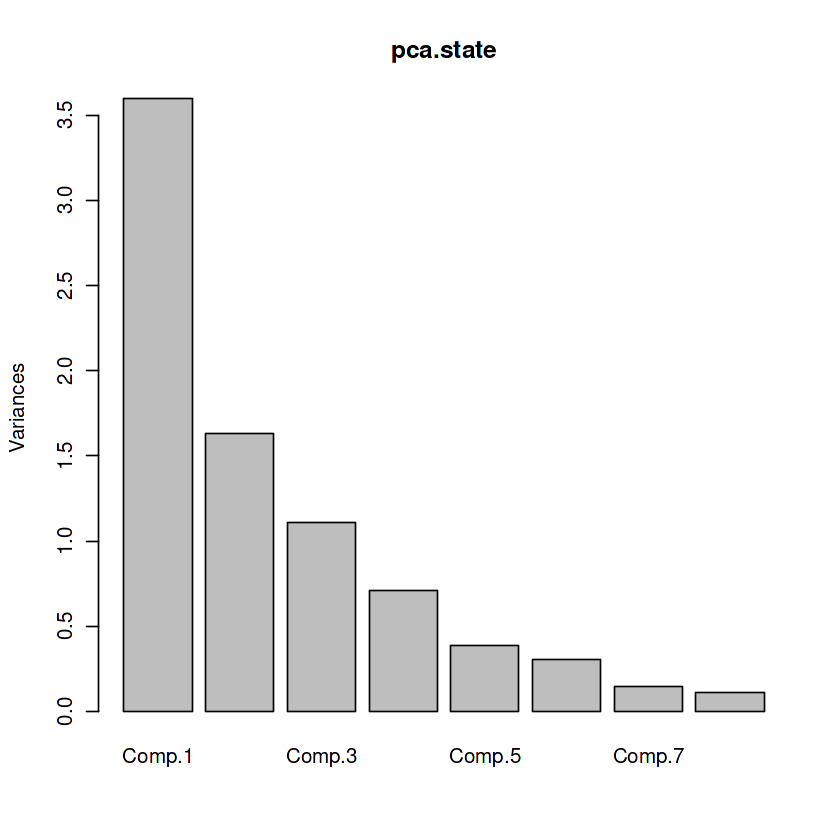

In [49]:
# Calcular PCs
pca.state <- princomp(state.x77, cor = TRUE, scores = TRUE) 

# Plota o objeto PCA
plot(pca.state)

In [50]:
# Imprime o resumo dos PCs
summary(pca.state)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.8970755 1.2774659 1.0544862 0.84113269 0.62019488
Proportion of Variance 0.4498619 0.2039899 0.1389926 0.08843803 0.04808021
Cumulative Proportion  0.4498619 0.6538519 0.7928445 0.88128252 0.92936273
                           Comp.6    Comp.7     Comp.8
Standard deviation     0.55449226 0.3800642 0.33643379
Proportion of Variance 0.03843271 0.0180561 0.01414846
Cumulative Proportion  0.96779544 0.9858515 1.00000000

In [51]:
# Variação explicada por cada PC
pca.var <- pca.state$sdev^2

# Proporção da variação explicada por cada PC
pca.pvar <- pca.var/sum(pca.var)

# Proporção de variância explicada por cada componente principal
pca.pvar

Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6     Comp.7 
0.44986195 0.20398990 0.13899264 0.08843803 0.04808021 0.03843271 0.01805610 
    Comp.8 
0.01414846

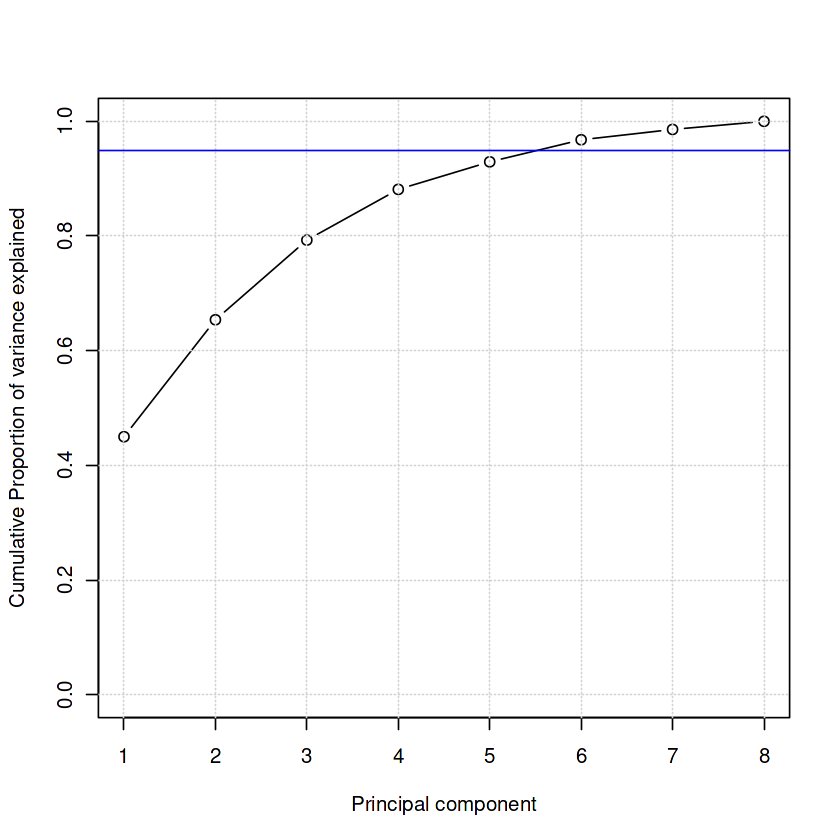

In [52]:
# Gráfico explicado de variância cumulativa
plot(cumsum(pca.pvar), xlab = "Componente principal", ylab = "Proporção cumulativa de variância explicada", ylim = c(0,1), type = 'b')
grid()

# Adiciona uma linha horizontal
abline(h = 0.95, col = "blue")

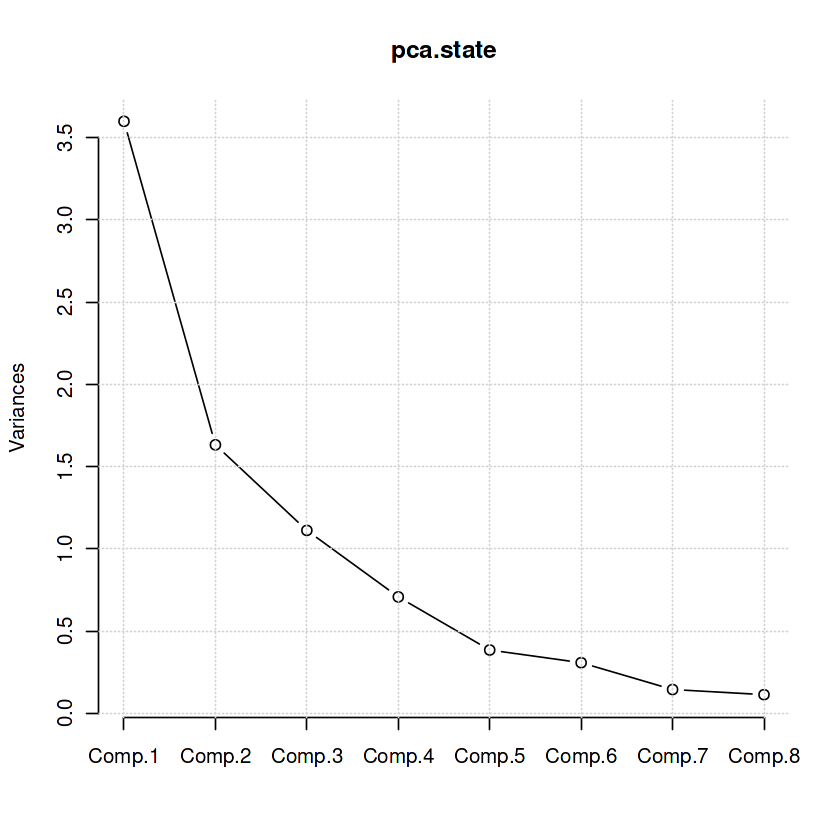

In [53]:
# Desenhar screeplot
screeplot(pca.state, type = "l")
grid()

# Interpretando as saídas do PCA

**Carregamentos**

Mostra os pesos que foram usados para construir o PCA. As entradas em branco no quadro de dados são valores próximos de zero e foram omitidos para fornecer uma interpretação clara.

**Pontuações do PCA**
* projeção do conjunto de dados original sobre os componentes principais.

http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/

https://search.r-project.org/CRAN/refmans/factoextra/html/fviz_pca.html

rdocumentation.org/packages/factoextra/versions/1.0.7/topics/fviz_pca

**Funciona no Rstudio**

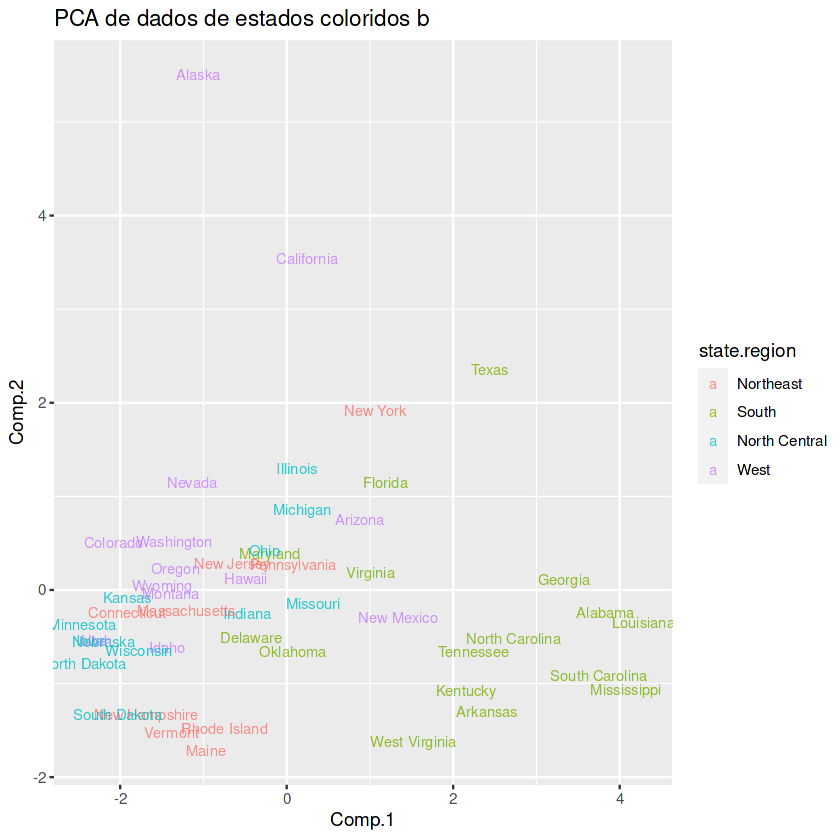

In [54]:
# Cria dataframe de pontuações
scores.state <- data.frame(pca.state$scores)

# Plot de pontuações coloridas por região
ggplot(data = scores.state, aes(x = Comp.1, y = Comp.2, label = rownames(scores.state), color = state.region)) + 
    geom_text(alpha = 0.8, size = 3) + 
    ggtitle("PCA dos dados de estados coloridos por região")

In [55]:
install.packages(c("FactoMineR", "factoextra"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘emmeans’ is not available”
also installing the dependency ‘flashClust’


Warning message in install.packages(c("FactoMineR", "factoextra")):
“installation of package ‘FactoMineR’ had non-zero exit status”
Warning message in install.packages(c("FactoMineR", "factoextra")):
“installation of package ‘factoextra’ had non-zero exit status”


In [56]:
library("FactoMineR")
library("factoextra")

ERROR: Error in library("FactoMineR"): there is no package called ‘FactoMineR’


In [ ]:
fviz_pca_ind(pca.state)

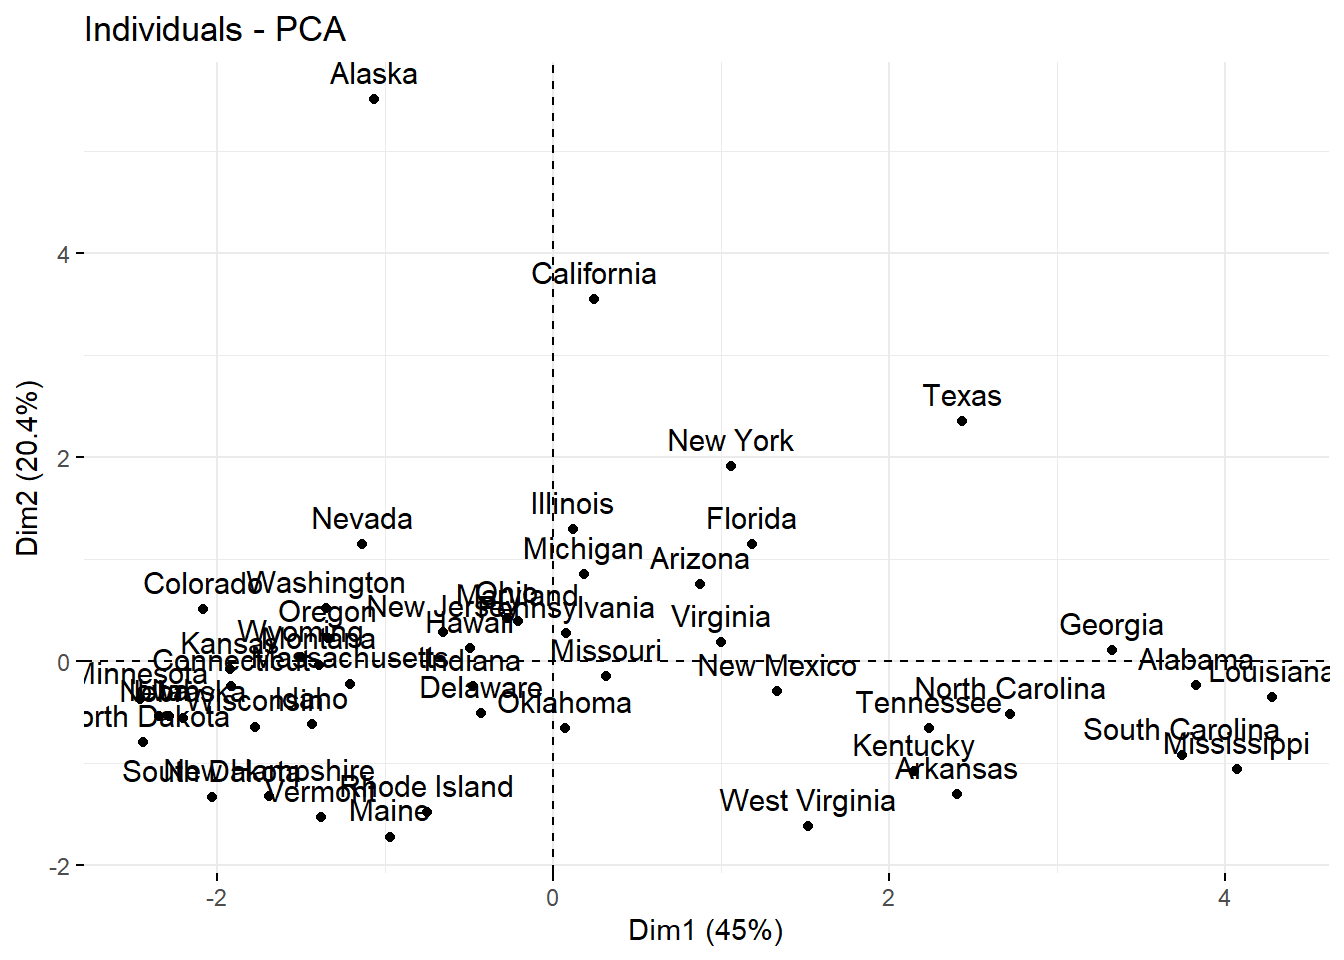

In [ ]:
fviz_pca_var(pca.state)

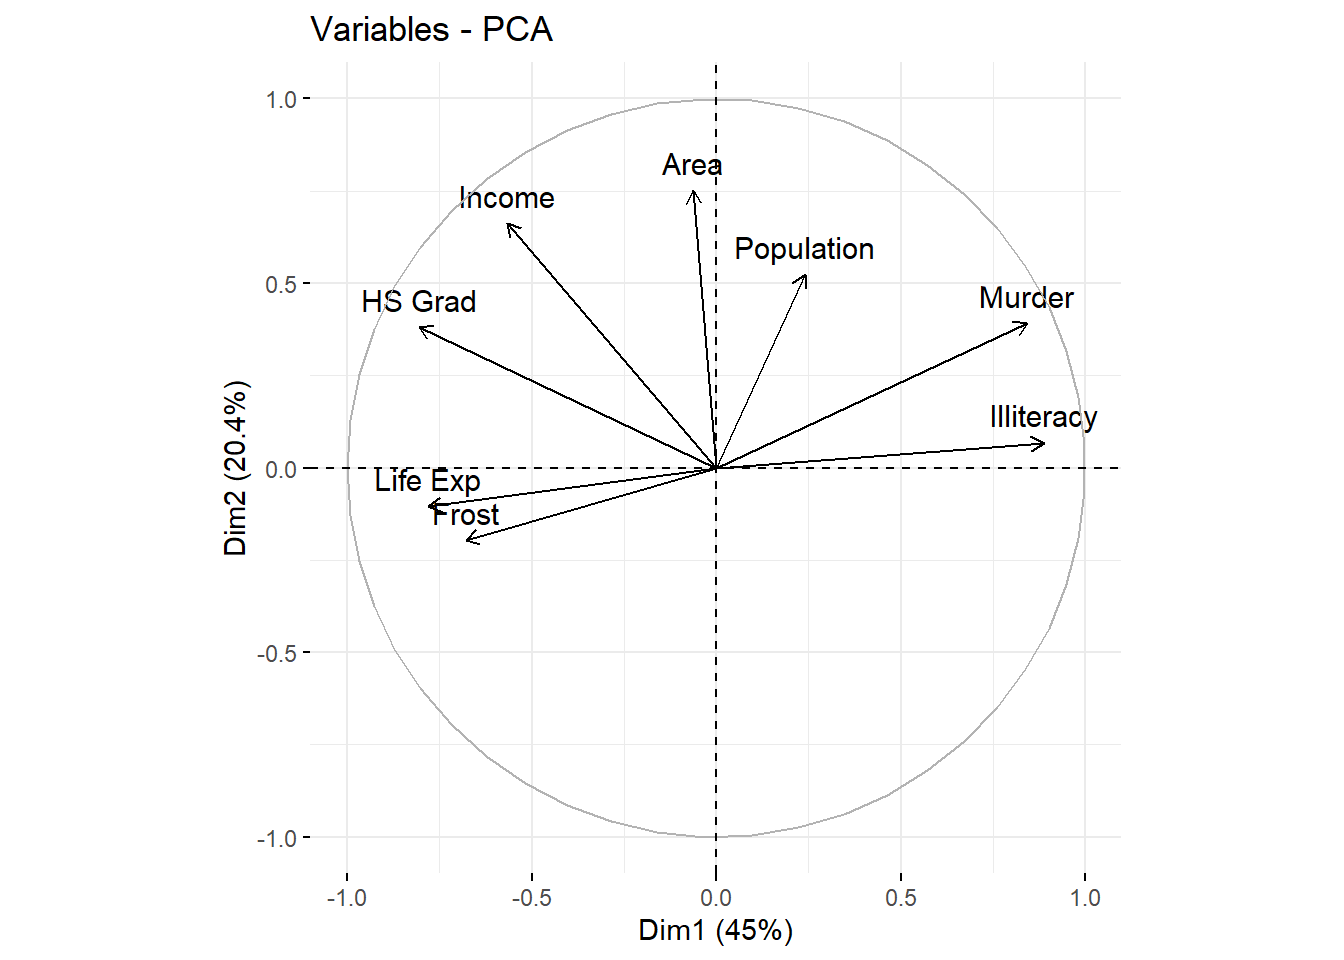

In [ ]:
fviz_pca_biplot(pca.state)

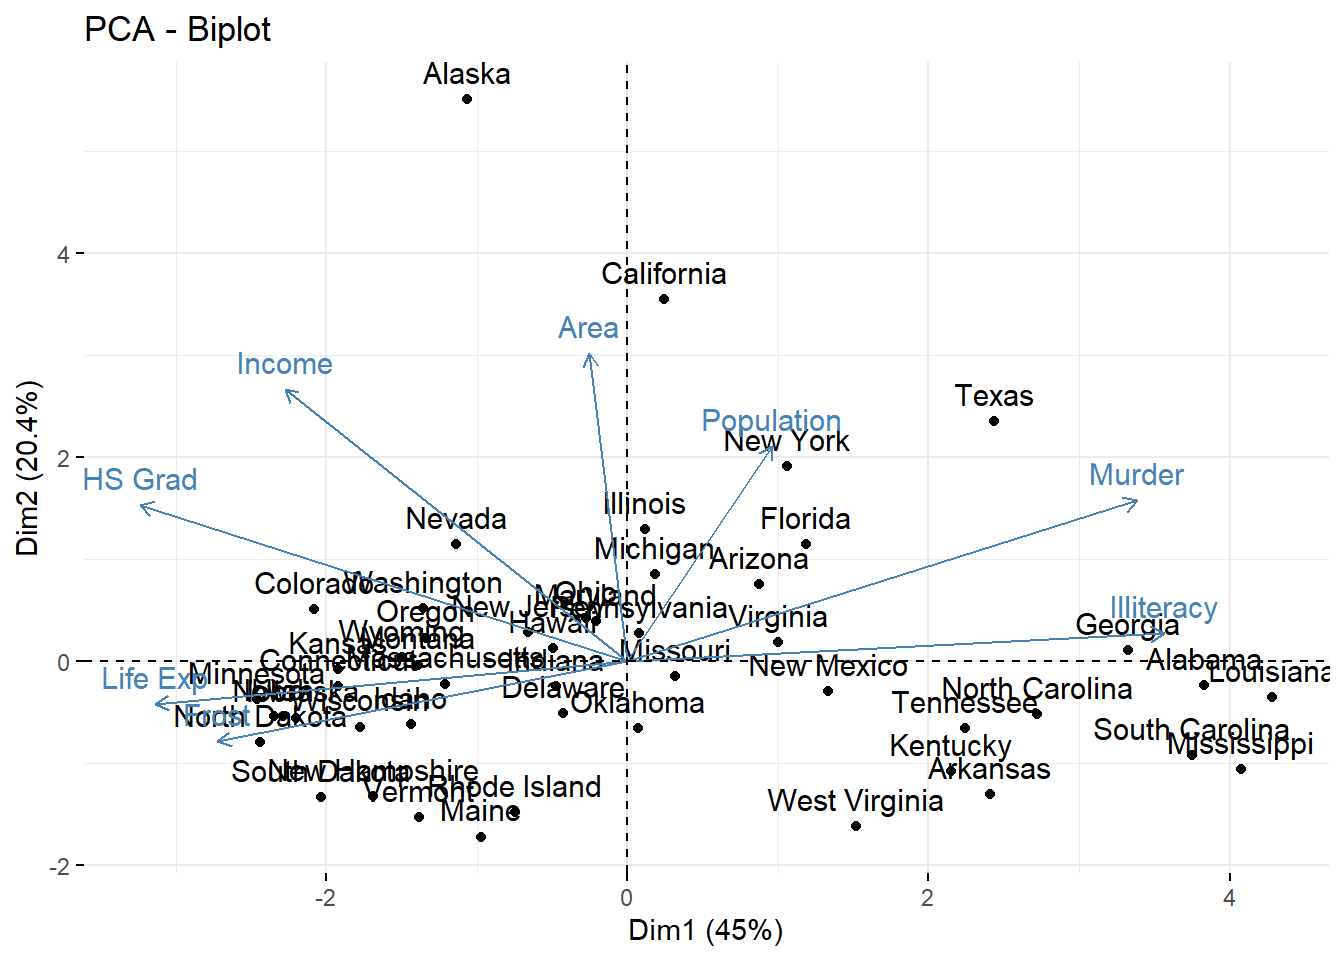

# Escalonamento multidimensional

Técnica para realizar a redução de dimensão. O objetivo principal do dimensionamento multidimensional é fornecer uma representação visual do padrão de proximidades, ou seja, as semelhanças ou distâncias, entre um conjunto de objetos.

Isso é feito atribuindo objetos a locais específicos em um espaço conceitual geralmente em duas ou três dimensões, de modo que as distâncias entre os pontos no espaço correspondam às semelhanças dadas o mais próximo possível.

# Escala multidimensional classica ou análise de coordenadas principais

* Entrada: distâncias de matriz;
* Saída: Conjunto de pontos em determinadas dimensões, de modo que as distâncias correspondam às distâncias de entrada.

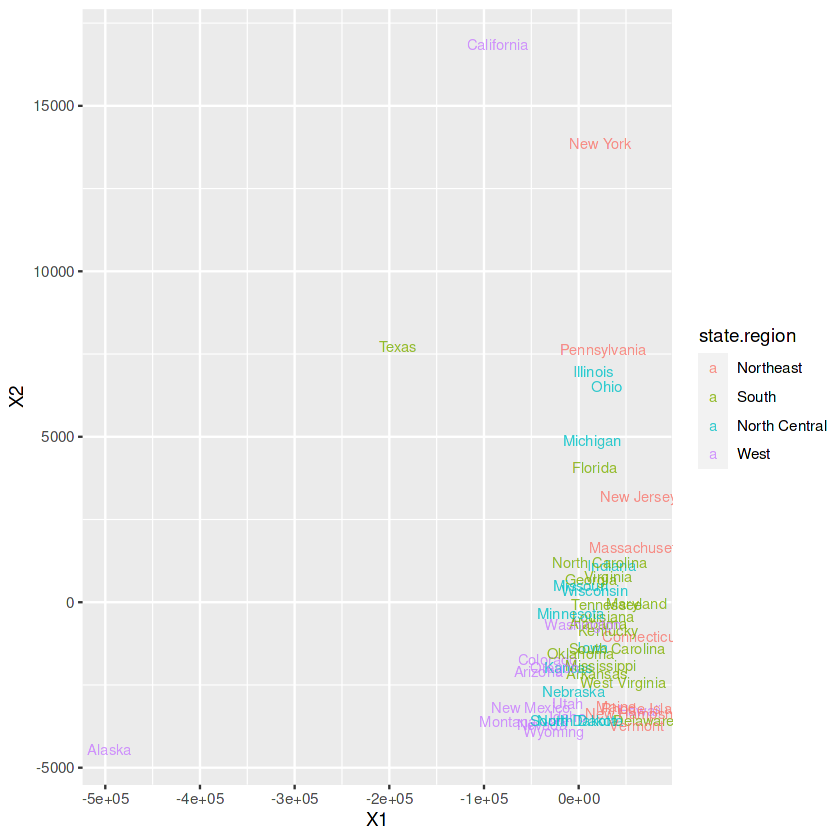

In [57]:
# Calcula distância
state.dist <- dist(state.x77)

# Executar dimensionamento multidimensional
mds.state <- cmdscale(state.dist) 

# Altere mds.state para um dataframe para uso no ggplot
mds.state_df <- data.frame(mds.state)

# Plota a representação dos dados em duas dimensões
ggplot(data = mds.state_df, aes(x = X1, y = X2, label = rownames(mds.state), color = state.region)) + 
    geom_text(alpha = 0.8, size = 3)

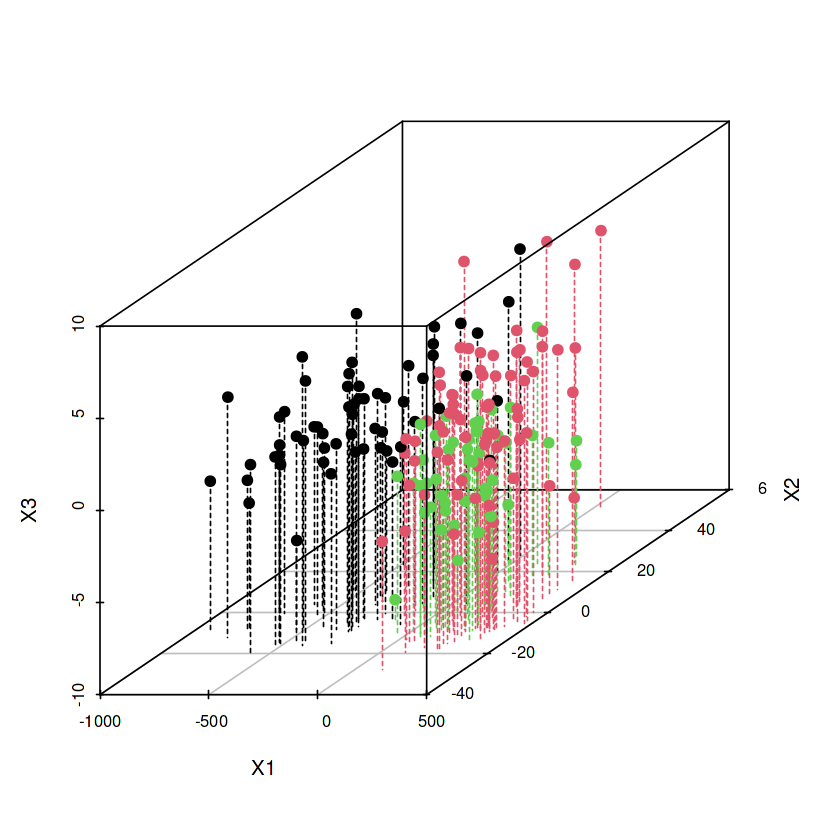

In [58]:
# Calcula distância
wine.dist <- dist(wine[,-1])

# Executar dimensionamento multidimensional
mds.wine <- cmdscale(wine.dist, k = 3) 
mds.wine_df <- data.frame(mds.wine)

# Plota a representação dos dados em três dimensões
scatterplot3d(mds.wine_df, color = wine$Type, pch = 19, type = "h", lty.hplot = 2)

Adaptado de: https://rpubs.com/arquez9512/mv-distributions e https://rstudio-pubs-static.s3.amazonaws.com/710811_daf1b7fb10d24bd09e2ffe5ba297bb3d.html